#Alucar -  Analisando as Vendas

In [39]:
import pandas as pd

In [40]:
alucar = pd.read_csv('alucar.csv')

In [41]:
print('Quantidade de linha e colunas: ', alucar.shape)

Quantidade de linha e colunas:  (24, 2)


In [42]:
print('Quantidade de linhas nulas: ', alucar.isna().sum().sum())

Quantidade de linhas nulas:  0


In [43]:
#Converter o tipo de Object para DateTime
alucar['mes'] = pd.to_datetime(alucar.mes)

In [44]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [45]:
#Verificar a versão do Seaborn
print (sns.__version__)

0.9.0


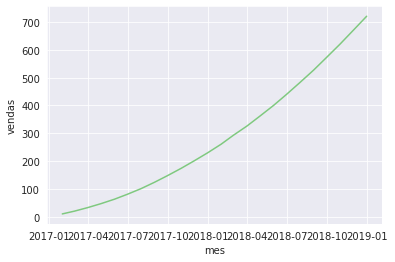

In [46]:
sns.lineplot(x='mes', y='vendas', data=alucar)

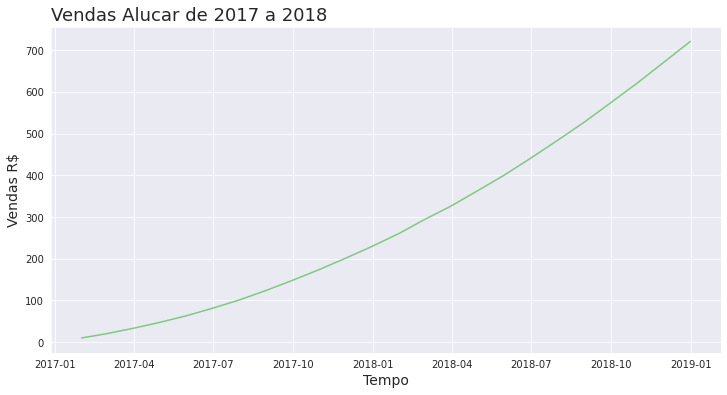

In [47]:
#Configuração do gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas R$', fontsize=14)
ax = ax

In [48]:
alucar['aumento'] = alucar.vendas.diff()

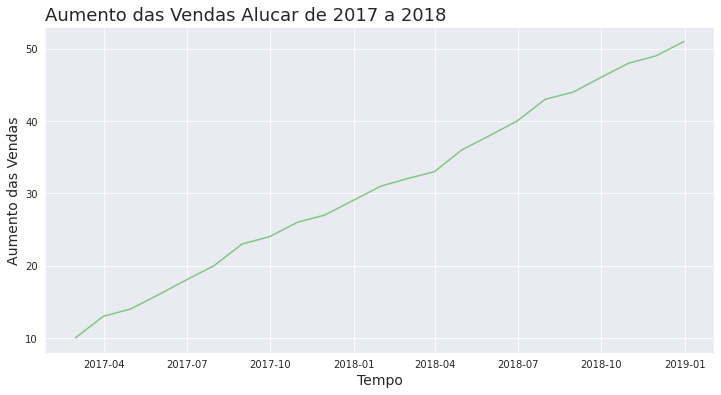

In [49]:
#Configuração do gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento das Vendas', fontsize=14)
ax = ax

In [50]:
def plotar(titulo, labelx, labely, x, y, dataset):
  #Configuração do gráfico
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

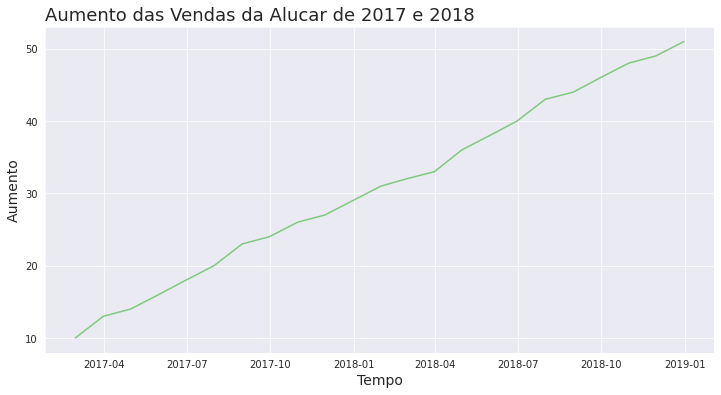

In [51]:
plotar( 'Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
       'mes', 'aumento', alucar)

In [52]:
#Aceleraçãl do Crescimento
alucar['aceleracao'] = alucar.aumento.diff()

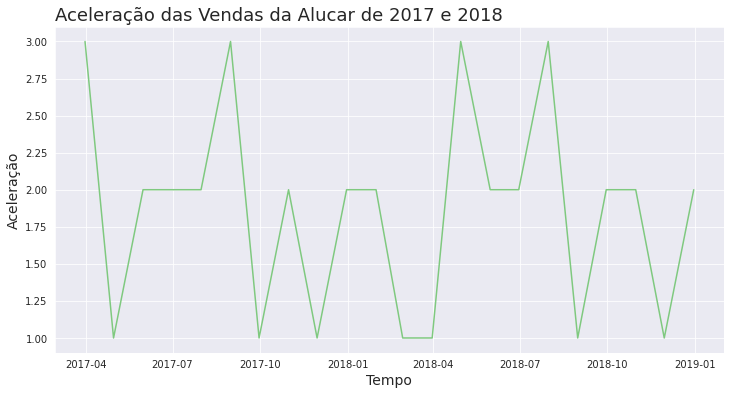

In [53]:
#Plotar aceleração
plotar( 'Aceleração das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
       'mes', 'aceleracao', alucar)

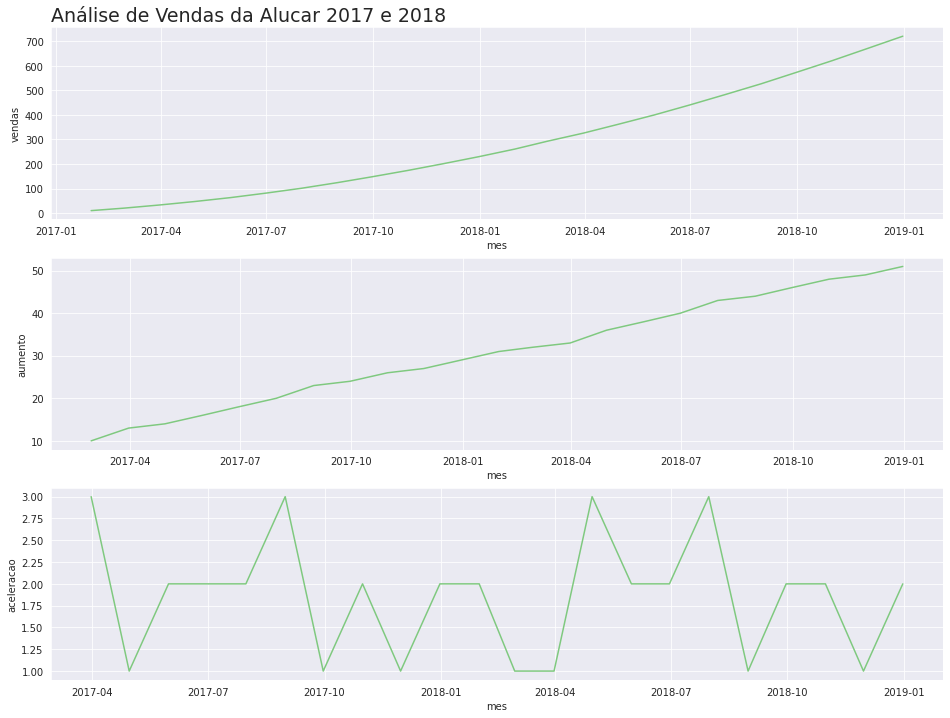

In [54]:
#Colocando vários gráficos em uma mesma linha
plt.figure(figsize=(16,12))
# 1 Grafico
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar 2017 e 2018', fontsize=19, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
# 2 Gráfico
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
# 3 Gráfico
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
## Esse tipo de atribuição retira a apresentação da alocação de memória
ax = ax

In [55]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  #Colocando vários gráficos em uma mesma linha
  plt.figure(figsize=(16,12))
  # 1 Grafico
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize=19, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  # 2 Gráfico
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  # 3 Gráfico
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ## Esse tipo de atribuição retira a apresentação da alocação de memória
  ax = ax

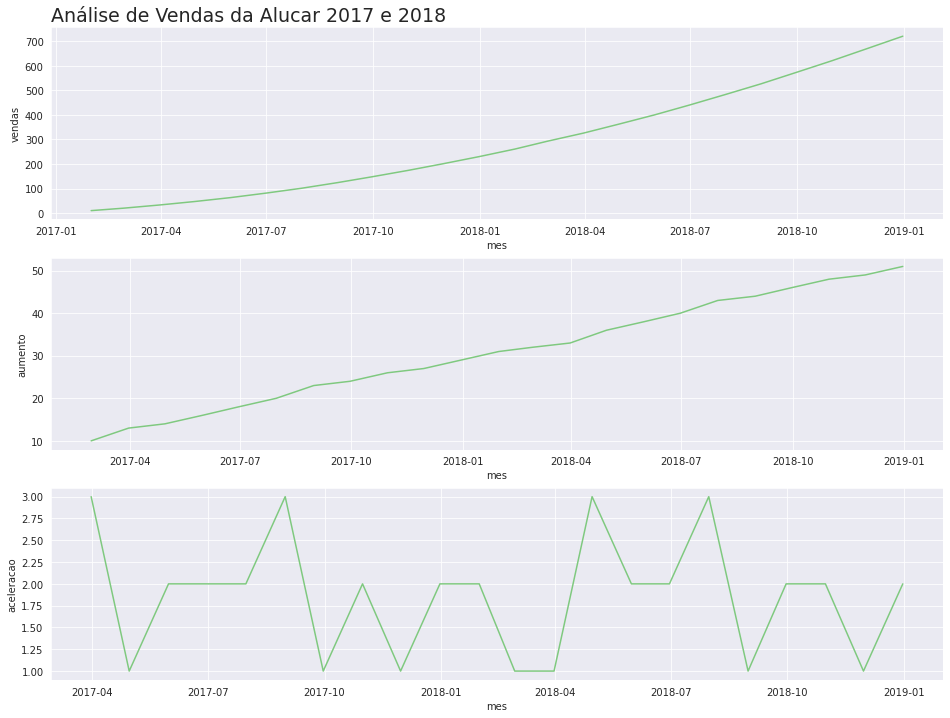

In [56]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar
                , 'Análise de Vendas da Alucar 2017 e 2018')

In [57]:
#Biblioteca para auto correlação
from pandas.plotting import autocorrelation_plot

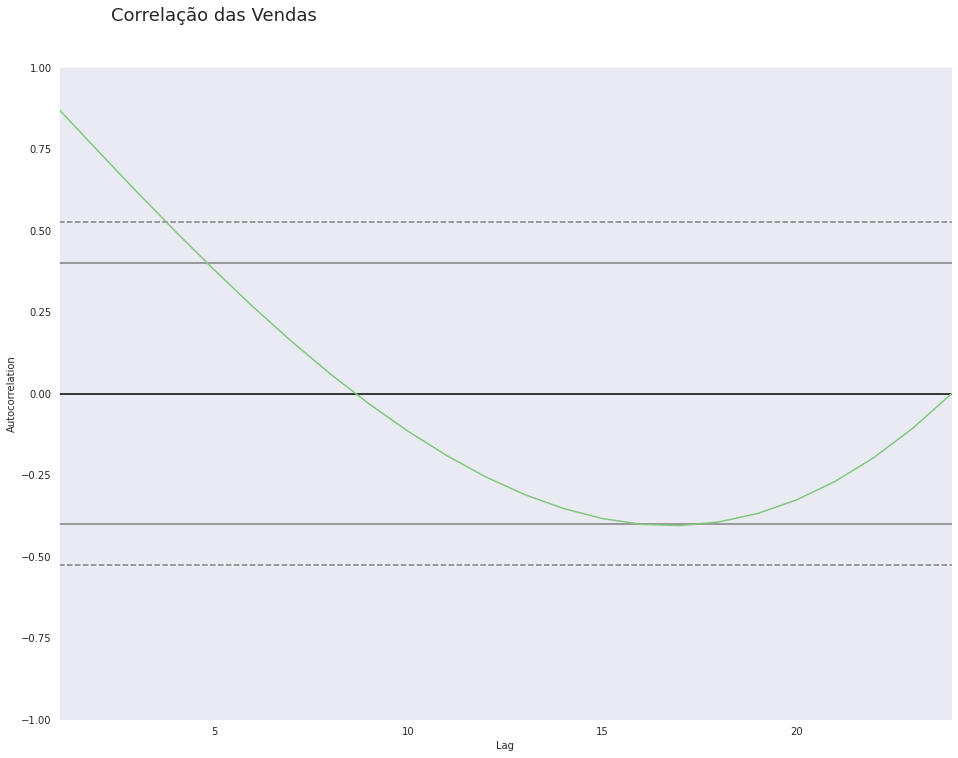

In [58]:
#Correlação das Vendas
ax = plt.figure(figsize=(16,12))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

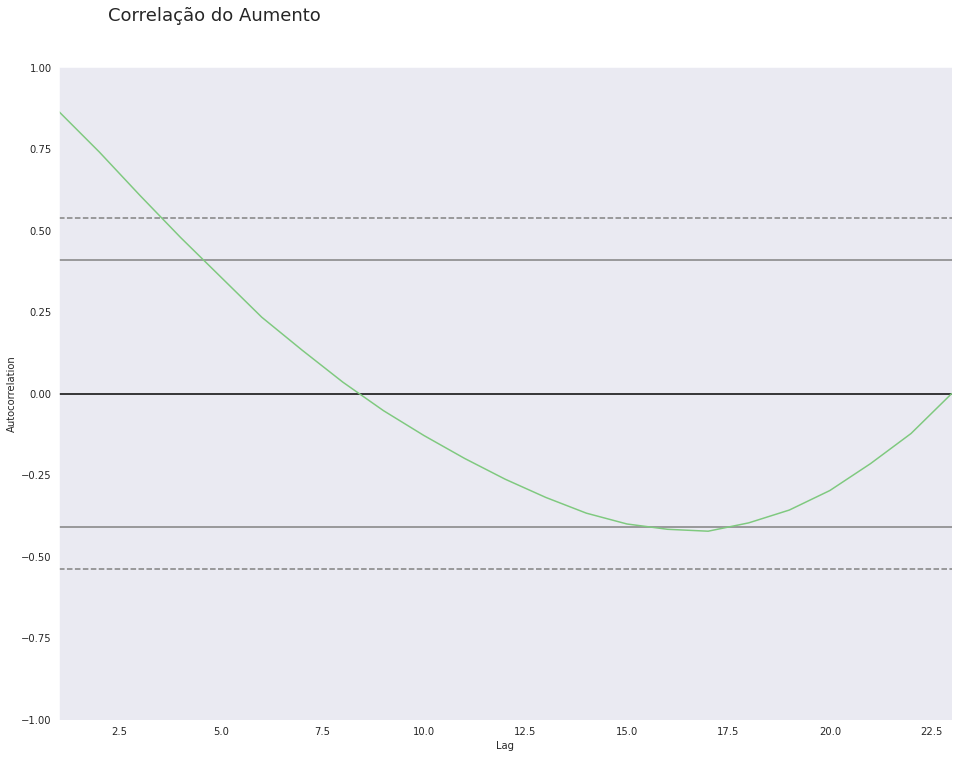

In [59]:
 #Correlação do Aumento (Index zero precisa ser descartado porque possui valor NaN)
ax = plt.figure(figsize=(16,12))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

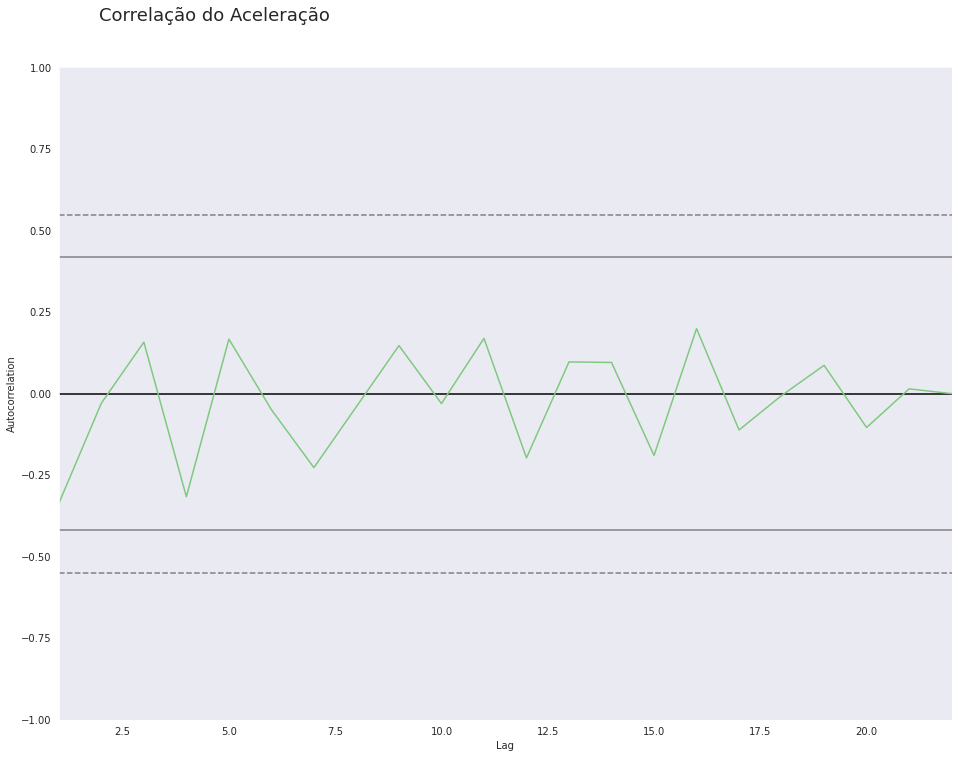

In [60]:
 #Correlação do Aceleração (Index zero e um precisa ser descartado porque possui valor NaN)
ax = plt.figure(figsize=(16,12))
ax.suptitle('Correlação do Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando Assinantes Newsletter

In [61]:
assinates = pd.read_csv('newsletter_alucar.csv')
assinates.head(10)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [62]:
 assinates.dtypes

mes           object
assinantes     int64
dtype: object

In [63]:
print('Quantidade de linhas e colunas {}'.format(assinates.shape))

Quantidade de linhas e colunas (24, 2)


In [64]:
 print('Quantidade de linhas nulas \n{}'.format(  assinates.isna().sum() ))

Quantidade de linhas nulas 
mes           0
assinantes    0
dtype: int64


In [65]:
 #Converter o tipo para Datetime
 assinates['mes'] = pd.to_datetime(assinates.mes)

In [66]:
assinates['aumento'] = assinates.assinantes.diff() 

In [67]:
assinates['aceleracao'] = assinates.aumento.diff()

In [68]:
 assinates.head(10)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


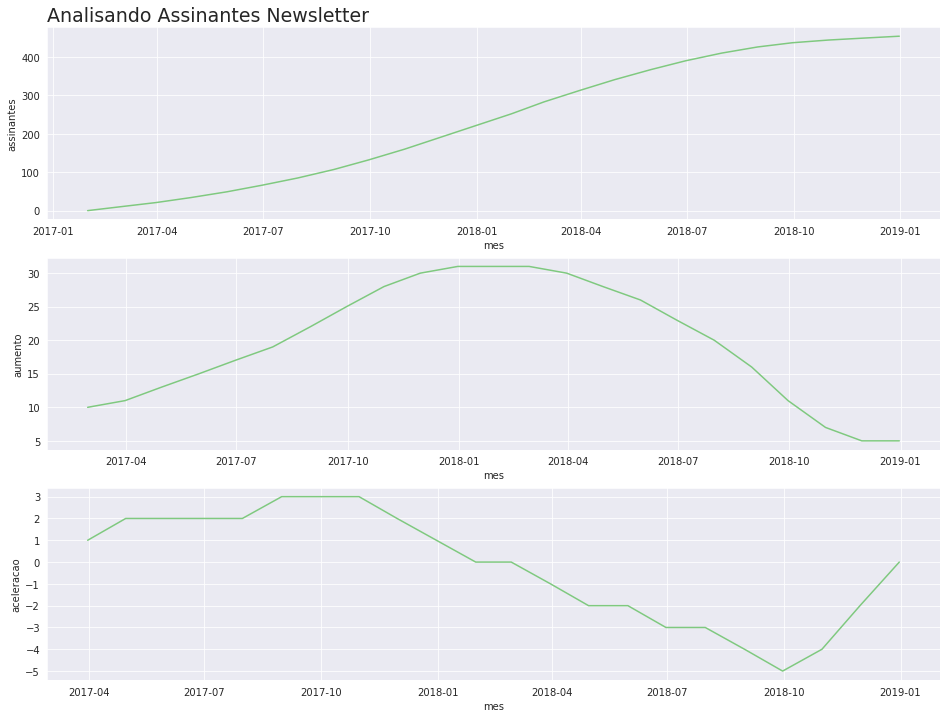

In [69]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinates, 'Analisando Assinantes Newsletter')

# Chocolura - Analisando as Vendas




In [70]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head(5)

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [71]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [72]:
print('Quantidade de linhas e colunas {}'.format(chocolura.shape))
print('Quantidade de linhas nulas \n{}'.format(chocolura.isna().sum()))

Quantidade de linhas e colunas (24, 2)
Quantidade de linhas nulas 
mes       0
vendas    0
dtype: int64


In [73]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

In [74]:
chocolura.head(5)

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


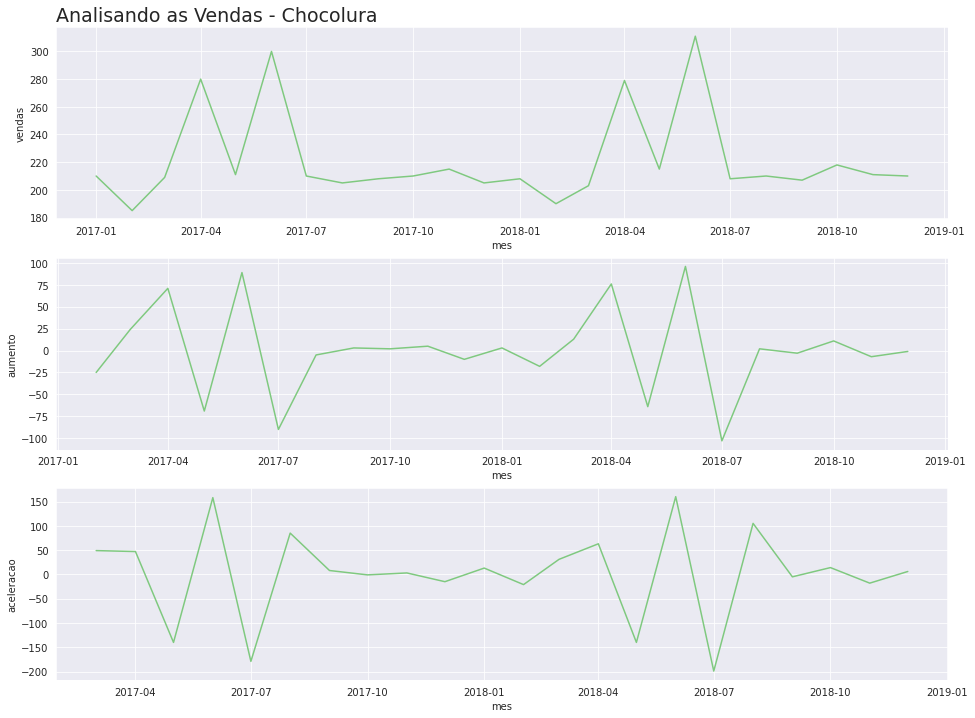

In [75]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Analisando as Vendas - Chocolura')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [76]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head(5)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [77]:
print('Quantidade de linhas: ', vendas_por_dia.shape[0])
print('QUantidade de linhas nulas \n{}'.format(vendas_por_dia.isna().sum()))

Quantidade de linhas:  61
QUantidade de linhas nulas 
dia       0
vendas    0
dtype: int64


In [80]:
#Converte para Data
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [81]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [84]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()

In [86]:
#vendas_por_dia.drop(columns=['acumulado'], inplace=True) ##-- Remover coluna
vendas_por_dia.head(5)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


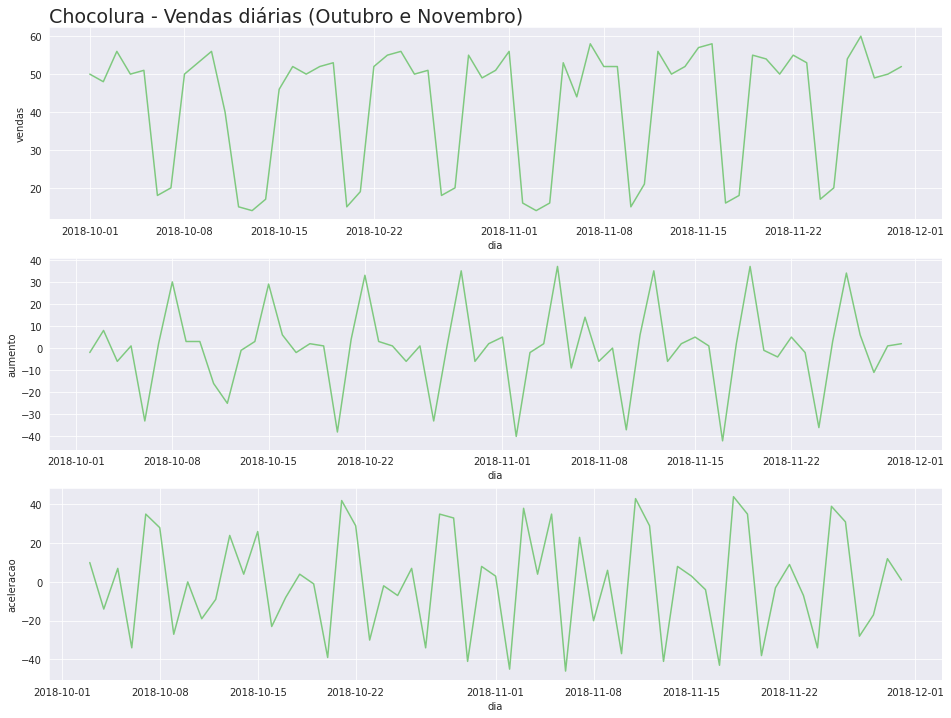

In [87]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Chocolura - Vendas diárias (Outubro e Novembro)')

**Analisandlo a Sazonalidade**

In [99]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [100]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [104]:
dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday': 'Terca', 
    'Wednesday': 'Quarta', 
    'Thursday': 'Quinta', 
    'Friday': 'Sexta', 
    'Saturday': 'Sabado',
    'Sunday': 'Domingo'
}

vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [105]:
vendas_por_dia.head(5)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


**Agrupando os Dias**

In [111]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [113]:
#vendas_agrupaadas = None
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação as vendas diárias**

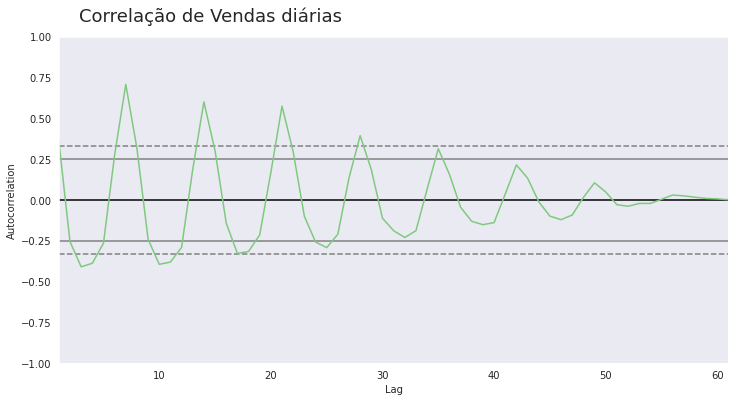

In [114]:
#Correlação de Vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax 

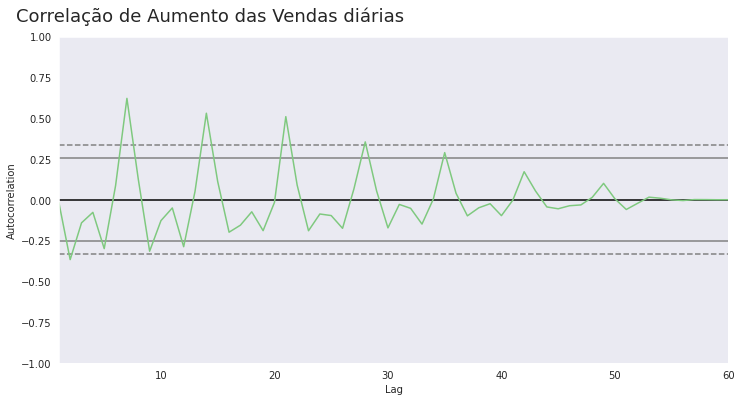

In [115]:
 #Correlação de Aumento
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de Aumento das Vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax 

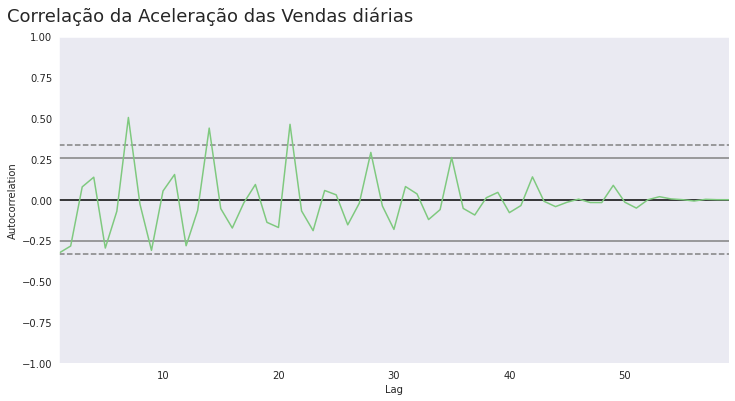

In [117]:
#Correlação de Aceleração das Vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração das Vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax 

# Cafelura - Análise de Vendas

In [118]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head(5)

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [120]:
#Converter o tipo para data
cafelura['mes'] = pd.to_datetime(cafelura.mes)

In [121]:
print('Quantidade de linhas: ', cafelura.shape[0])
print('Quantidade de valores nulos \n{}'.format(cafelura.isna().sum()))

Quantidade de linhas:  24
Quantidade de valores nulos 
mes       0
vendas    0
dtype: int64


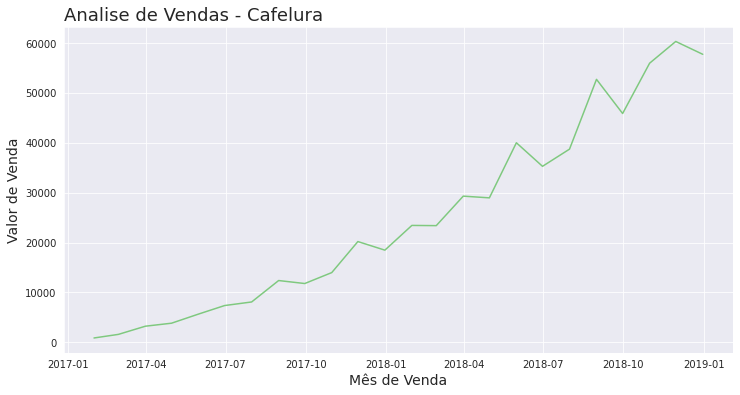

In [122]:
plotar('Analise de Vendas - Cafelura', 'Mês de Venda', 'Valor de Venda'
      , 'mes', 'vendas', cafelura)

In [124]:
quantidade_de_dias_fs = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_fs.head(5)

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [126]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_fs['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


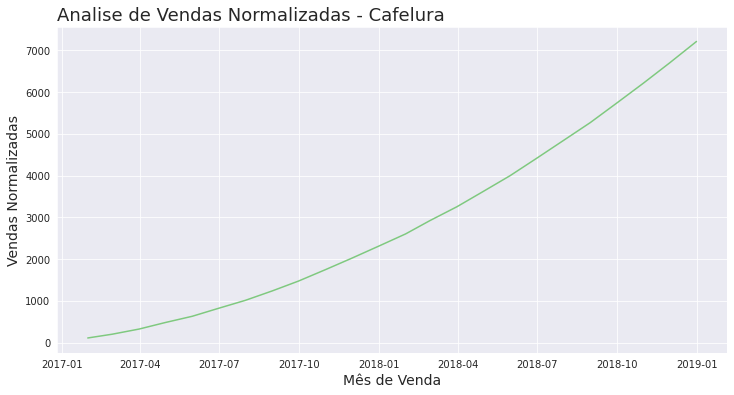

In [127]:
plotar('Analise de Vendas Normalizadas - Cafelura', 'Mês de Venda', 'Vendas Normalizadas'
      , 'mes', 'vendas_normalizadas', cafelura)

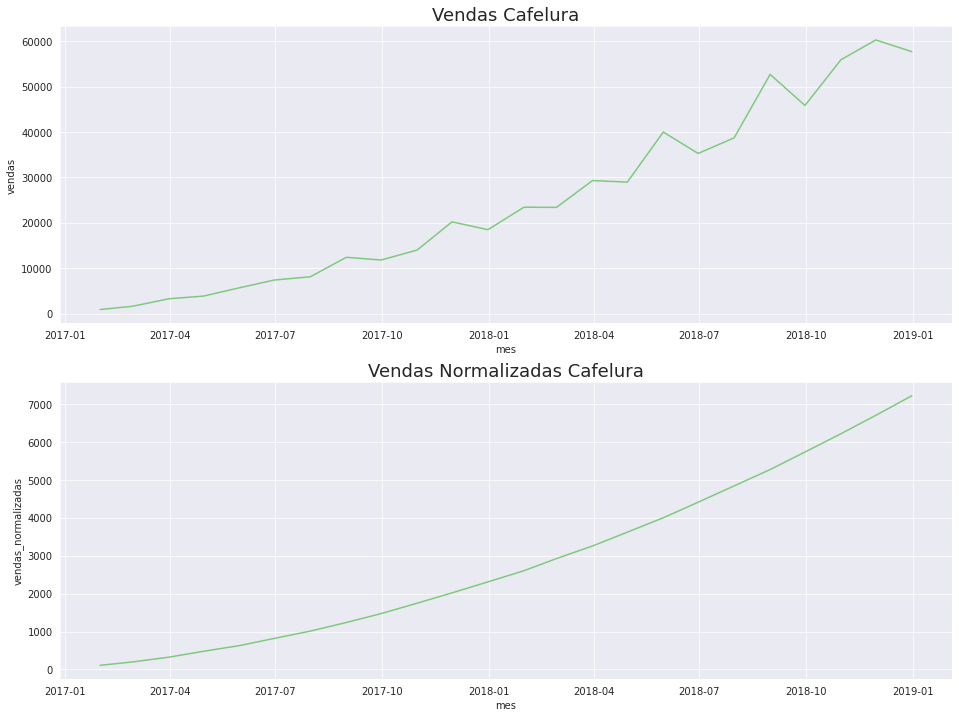

In [128]:
plt.figure(figsize=(16,12))
#Gráfico 1
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
#GRafico 2
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Stats Models

In [129]:
#Função com modelos estatisticos
from statsmodels.tsa.seasonal import seasonal_decompose 

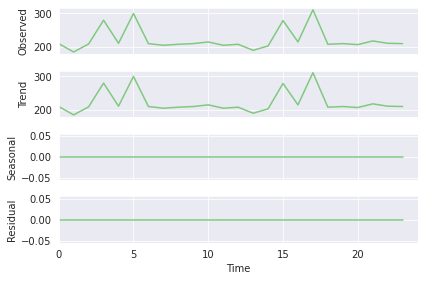

In [135]:
 resultado = seasonal_decompose([chocolura['vendas']], freq=1)
 ax = resultado.plot()

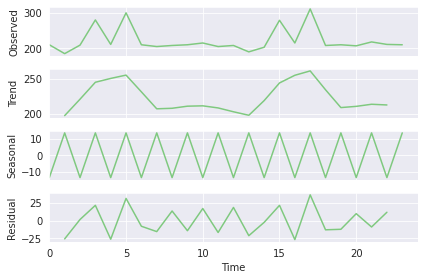

In [136]:
 #Variação da frequência - Valor 2
 resultado = seasonal_decompose([chocolura['vendas']], freq=2)
 ax = resultado.plot()

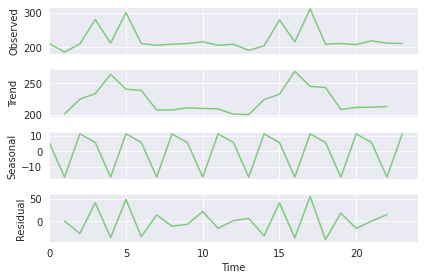

In [137]:
 #Variação da frequência - Valor 3
 resultado = seasonal_decompose([chocolura['vendas']], freq=3)
 ax = resultado.plot()

In [138]:
#Melhorar a visualização dos gráficos
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [139]:
data = ( {
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


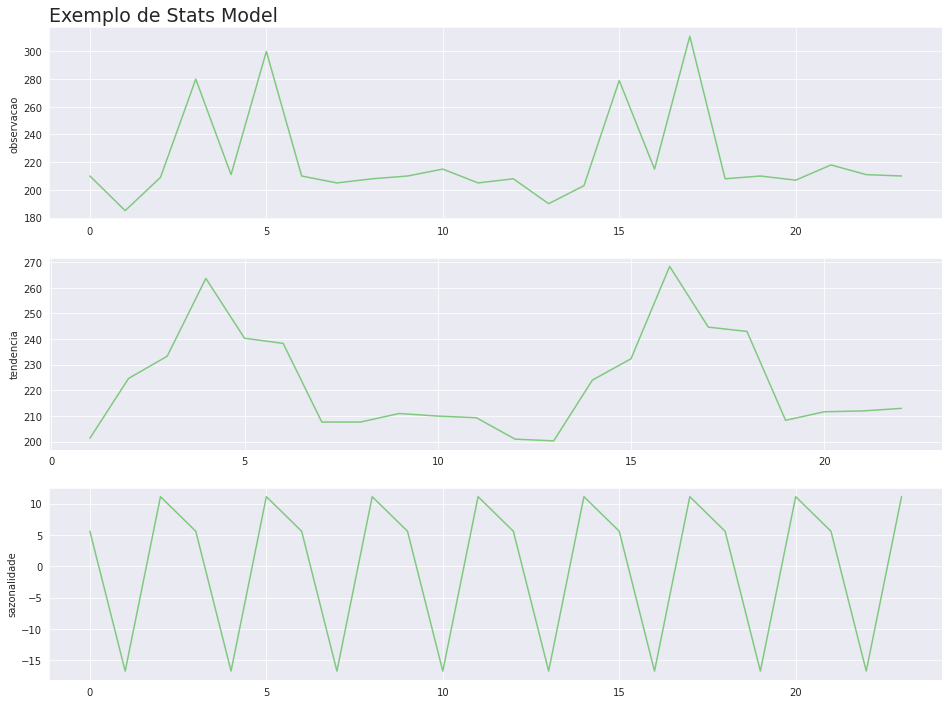

In [141]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Stats Model')

# Alucel - Analise de Vendas

In [143]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [144]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [145]:
alucel['dia'] = pd.to_datetime(alucel.dia)

In [148]:
print('Quantidade de Linhas e Colunans: ', alucel.shape)
print('Quantidade de linhas nulas \n{}'.format(alucel.isna().sum()))

Quantidade de Linhas e Colunans:  (61, 2)
Quantidade de linhas nulas 
dia       0
vendas    0
dtype: int64


In [150]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head(5)

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


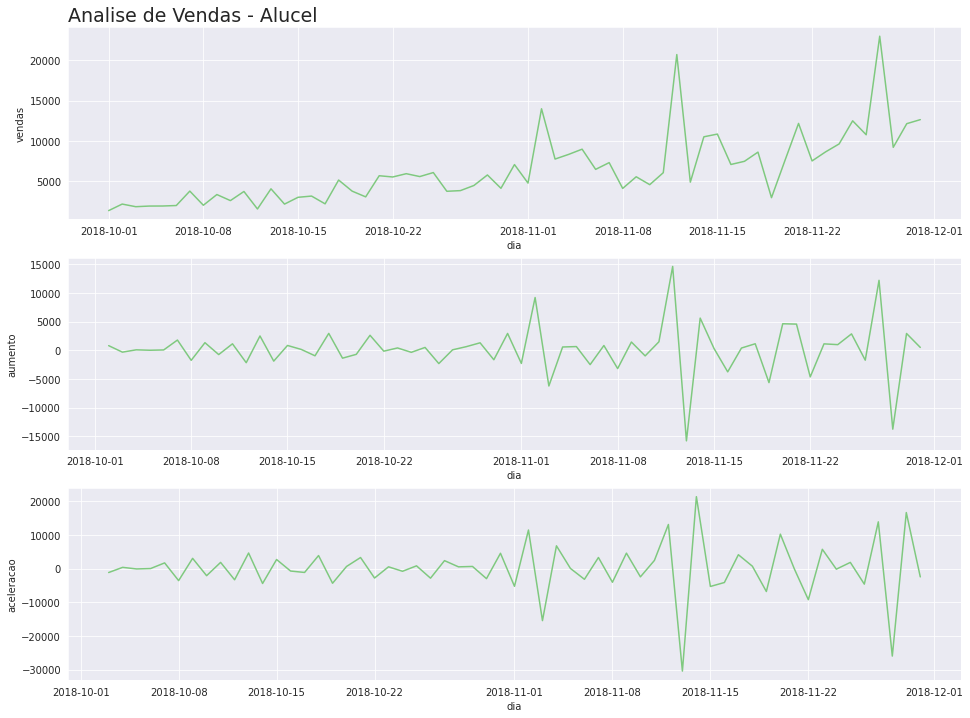

In [152]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Analise de Vendas - Alucel')

**Média Móvel**

In [153]:
#Calcular a media móvel com intervalo de 7 dias
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [156]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


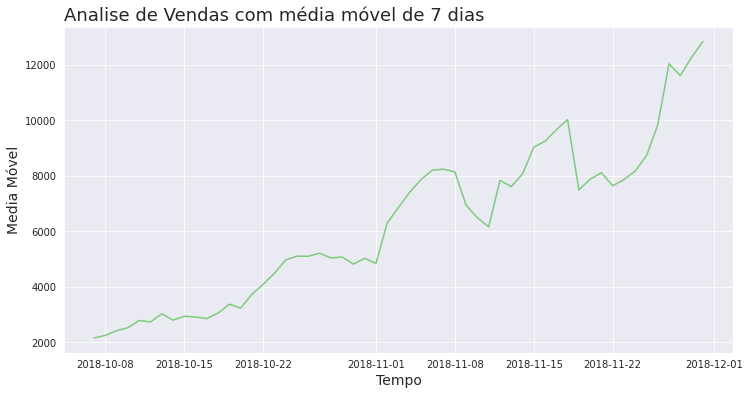

In [157]:
plotar('Analise de Vendas com média móvel de 7 dias', 'Tempo', 'Media Móvel', 'dia', 'media_movel', alucel)

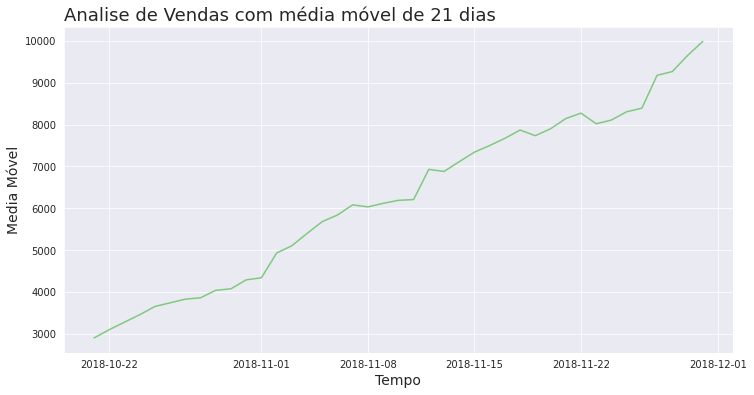

In [158]:
 #Calcular a media móvel com intervalo de 21 dias
alucel['media_movel_21_dias'] = alucel['vendas'].rolling(21).mean()
plotar('Analise de Vendas com média móvel de 21 dias', 'Tempo', 'Media Móvel', 'dia', 'media_movel_21_dias', alucel)

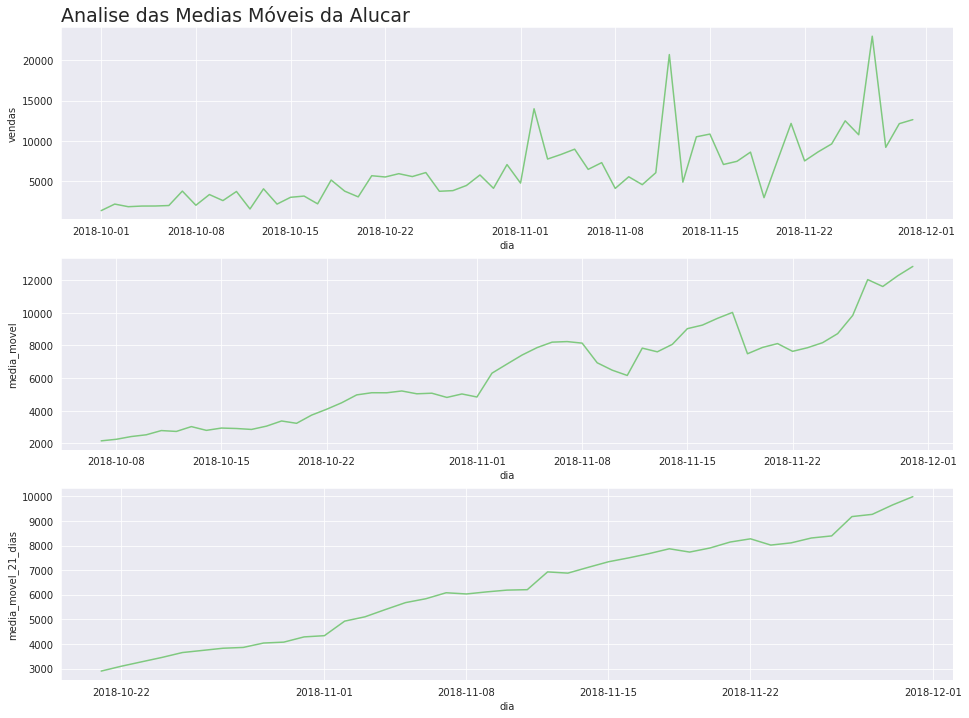

In [160]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21_dias', alucel, 'Analise das Medias Móveis da Alucar')